In [1]:
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

In [2]:
rnd = np.random.RandomState(0)
# generate a noisy sine wave to act as our fake observations
n_timesteps = 100
x = np.linspace(0, 3 * np.pi, n_timesteps)
observations = 20 * (np.sin(x) + 0.5 * rnd.randn(n_timesteps))
# create a Kalman Filter by hinting at the size of the state and observation
# space.  If you already have good guesses for the initial parameters, put them
# in here.  The Kalman Filter will try to learn the values of all variables.
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))

fitted model: <pykalman.standard.KalmanFilter object at 0x7f1b8cf02f98>


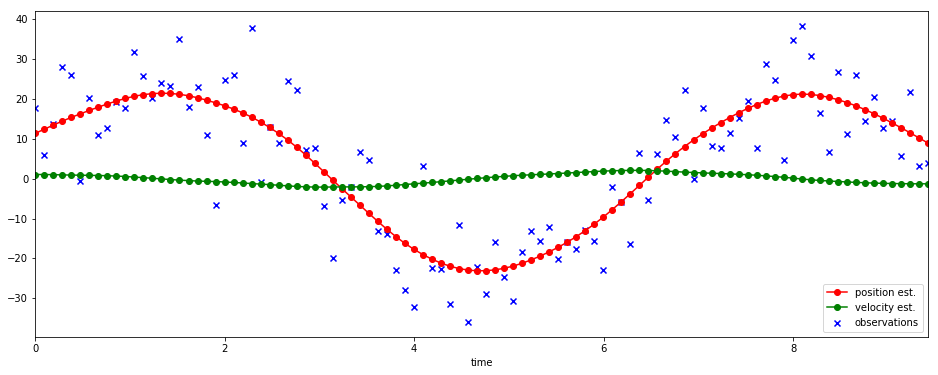

In [4]:
# You can use the Kalman Filter immediately without fitting, but its estimates
# may not be as good as if you fit first.
states_pred = kf.em(observations).smooth(observations)[0]
print('fitted model: {0}'.format(kf))

# Plot lines for the observations without noise, the estimated position of the
# target before fitting, and the estimated position after fitting.
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, observations, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred[:, 0],
                        linestyle='-', marker='o', color='r',
                        label='position est.')
velocity_line = pl.plot(x, states_pred[:, 1],
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
pl.legend(loc='lower right')
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()

In [39]:
from scipy.stats import multivariate_normal
Q = kf.transition_covariance
A = kf.transition_matrices
C = kf.observation_matrices
R = kf.observation_covariance
kf2 = KalmanFilter(transition_matrices=A, observation_matrices=C, transition_covariance=Q, observation_covariance=R)


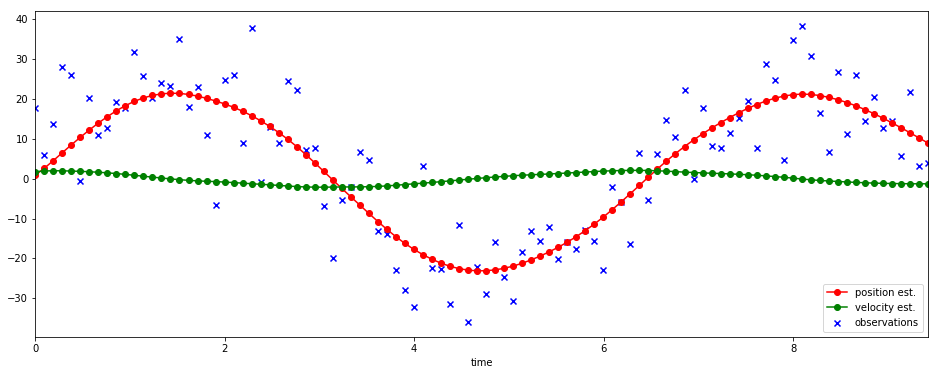

In [40]:
aa = kf2.smooth(observations)[0]
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, observations, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, aa[:, 0],
                        linestyle='-', marker='o', color='r',
                        label='position est.')
velocity_line = pl.plot(x, aa[:, 1],
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
pl.legend(loc='lower right')
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()

In [38]:
# x0 = np.array([[10], [0]])
# x_last = x0
# Xs = []
# # Xs.append(x_last)
# for i in range(100):
#     noise = multivariate_normal.rvs(np.zeros(2), R)
#     noise.shape = (2,1)
#     xt = np.dot(C, x_last) 
#     x_last = xt
# #     x_temp = xt
# #     x_temp.shape = (2,)
#     Xs.append(xt)
# Xs = np.concatenate(Xs, 1)
# Xs.shape

In [43]:
kf = KalmanFilter(transition_matrices = [[1, 1], [0, 1]], observation_matrices = [[0.1, 0.5], [-0.3, 0.0]])
measurements = np.asarray([[1,0], [0,0], [0,1]])  # 3 observations
kf = kf.em(measurements, n_iter=5)
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)
smoothed_state_means.shape

(3, 2)

In [ ]:
plt.figure(figsize=(16, 6))
position_line = plt.plot( smoothed_state_means[:, 0],
                        linestyle='-', marker='o', color='r',
                        label='position est.')
velocity_line = pl.plot(x, aa[:, 1],
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
pl.legend(loc='lower right')
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()